In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
#import h5py
#import scipy.io as so
fs=12
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
chlToN=1.6

In [3]:
saveloc='/data/eolson/MEOPAR/SS36runs/calcFiles/comparePhytoN/'
dirname1='HC201905_2015'
dirname2='HC201905_2016'
dirname3='HC201905_2017'
dirnames=(dirname1,dirname2,dirname3)
plist=['Sentry Shoal',]
varNameDict={'Sentry Shoal':'SentryShoal', 'S3':'S3'}
with open('/data/eolson/results/MEOPAR/analysis-elise-2/notebooks/bioTuning/spathsMaster.txt') as f:
    spaths = dict(x.strip().split() for x in f)
ff=dict()
for idir in dirnames:
    ff[idir]=dict()
    for pl in plist:
        print(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
        ff[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')

#ffN=dict()
#for idir in dirnames:
#    ffN[idir]=dict()
#    for pl in plist:
#        print(spaths[idir]+'ts_'+idir+'N_'+varNameDict[pl]+'.nc')
#        ffN[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'N_'+varNameDict[pl]+'.nc')

/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905_2015_SentryShoal.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905_2016_SentryShoal.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905_2017_SentryShoal.nc


In [5]:
# load Sentry Shoal Nitrate
filepathN = '/ocean/eolson/MEOPAR/obs/Hakai/SentryShoal/Sentry_Shoal_SUNA_Data_Submission_20190901.txt'

dfSS=pd.read_csv(filepathN,skiprows=6,header=None,delimiter='\t',#usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('Yearday','Year','Matlab time','Date time UTC','Original nitrate uM','Reprocessed nitrate uM','SBE temp degC','SBE salinity'),na_values=' NaN')

#ssdates = arrays['Full_SUNA_Processed'][0,:]
#sstimes = arrays['Full_SUNA_Processed'][1,:]
#sstemps = arrays['Full_SUNA_Processed'][2,:]
#sssals = arrays['Full_SUNA_Processed'][3,:]
ssnitrate = dfSS['Reprocessed nitrate uM']
py_times=np.array([dt.datetime.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in dfSS['Date time UTC']])
ssn = np.ma.masked_invalid(ssnitrate)

In [6]:
dfs=list()

In [10]:
tlim={'HC201905_2015':(dt.datetime(2015,1,1),dt.datetime(2015,12,31)), 
      'HC201905_2016':(dt.datetime(2016,1,1),dt.datetime(2016,12,31)), 
      'HC201905_2017':(dt.datetime(2017,1,1),dt.datetime(2017,12,31))}

In [14]:
times=dict()
for idir in dirnames:
    f=ff[idir]['Sentry Shoal']
    torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
    print(torig)
    times[idir]=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00
1900-01-01 00:00:00
1900-01-01 00:00:00


In [38]:

dateFmt = mdates.DateFormatter('%b')

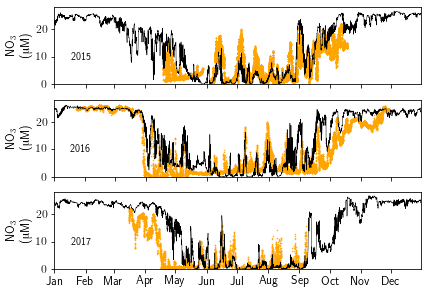

In [42]:
fig = plt.figure(figsize = (6,4))
gsv = gridspec.GridSpec(3,1,left=.09,right=.94,hspace=.2,bottom=.08,top=.99,height_ratios=[1,1,1])
gs15=gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsv[0],wspace=.3,hspace=.1,height_ratios=[1,1])
gs16=gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsv[1],wspace=.3,hspace=.1,height_ratios=[1,1])
gs17=gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsv[2],wspace=.3,hspace=.1,height_ratios=[1,1])
ax=dict()
for idir in dirnames:
    ax[idir]=dict()
    for rr in plist:
        ax[idir][rr]=dict()
            
ax[dirname1]['Sentry Shoal']['nit']=fig.add_subplot(gsv[0])
ax[dirname2]['Sentry Shoal']['nit']=fig.add_subplot(gsv[1])
ax[dirname3]['Sentry Shoal']['nit']=fig.add_subplot(gsv[2])


aalpha=1
lwid=.5
dateFmt = mdates.DateFormatter('%b')
iend={'S3':3,'Sentry Shoal':2}
for idir in dirnames:
    iiiSS=(py_times>=tlim[idir][0])&(py_times<=tlim[idir][1])
    pSSN,=ax[idir]['Sentry Shoal']['nit'].plot(py_times[iiiSS],ssn[iiiSS],'.',alpha=aalpha,color='orange',markersize=1)
    pSSN2,=ax[idir]['Sentry Shoal']['nit'].plot(dt.datetime(1900,1,1),1,'.',alpha=aalpha,color='orange',markersize=4)
    #ax[idir]['Sentry Shoal']['nit'].set_title(label=year[idir],pad=-9)
    
    fc=ff[idir]['Sentry Shoal']
    #fn=ffN[idir][rr]
    pN,=ax[idir]['Sentry Shoal']['nit'].plot(times[idir],
        np.sum(fc.variables['nitrate'][:,:iend[rr],0,0]*fc.variables['e3t'][:,:iend[rr],0,0],1)/np.sum(fc.variables['e3t'][:,:iend[rr],0,0],1),
            linestyle='-',alpha=aalpha,color='k',linewidth=lwid)
    ax[idir]['Sentry Shoal']['nit'].set_xlim(tlim[idir])
    ax[idir]['Sentry Shoal']['nit'].set_ylabel('NO$_3$\n($\muup$M)')
    ax[idir]['Sentry Shoal']['nit'].set_ylim(0,28)
    ax[idir]['Sentry Shoal']['nit'].set_xticklabels([])
ax['HC201905_2015']['Sentry Shoal']['nit'].text(dt.datetime(int(year['HC201905_2015']),1,27),9,'2015',ha='center')
ax['HC201905_2016']['Sentry Shoal']['nit'].text(dt.datetime(int(year['HC201905_2016']),1,27),9,'2016',ha='center')
ax['HC201905_2017']['Sentry Shoal']['nit'].text(dt.datetime(int(year['HC201905_2017']),1,27),9,'2017',ha='center')

ax[idir]['Sentry Shoal']['nit'].xaxis.set_major_formatter(dateFmt)
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/tsSeasonalCycle.eps',dpi=200)
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/tsSeasonalCycle.png',dpi=200,transparent=True)